In [1]:
import nltk
from nltk.corpus import cess_esp
from sklearn_crfsuite import CRF
from sklearn.model_selection import train_test_split

In [2]:
import ast

# Nombre del archivo a leer
nombre_archivo = "./corpus_otomi"

# Lista para almacenar los datos recuperados
datos_recuperados = []

# Leer el archivo y convertir cada línea en una lista de Python
with open(nombre_archivo, 'r', encoding='utf-8') as archivo:
    for linea in archivo:
        try:
            # Utilizamos ast.literal_eval para interpretar la línea como una lista válida en Python
            lista_datos = ast.literal_eval(linea.strip())
            datos_recuperados.append(lista_datos)
        except ValueError as e:
            print(f"Error al procesar la línea: {linea}")
            print(e)

corpus = datos_recuperados


In [3]:
len(corpus)

1705

In [4]:
corpus[0]

[[['n', 'psd'], ['dó', '1.cpl'], ['phu̱di', 'stem'], 'v'],
 [['dó', '1.cpl'], ['pe̱phí', 'stem'], 'v'],
 [['bi', '3.cpl'], ['t', 'lig'], ["'u̱n", 'stem'], ['gí', '1.obj'], 'v'],
 [['bi', '3.cpl'], ['mähtratá', 'stem'], ['gí', '1.obj'], 'v'],
 [['ko', 'stem'], 'obl'],
 [['chíkóhté', 'stem'], 'obl']]

In [5]:
from unidecode import unidecode
def get_corpus_list(corpus):
    biglst = []
    
    for sentence in corpus:
        shortlst = []
        for trozo in sentence:
            s = ""
            s.encode('utf-8')
            for chunk, gloss in trozo[:-1]:
                s += chunk
            pos = trozo[-1]
            shortlst.append((s, unidecode(pos)))
        biglst.append(shortlst)

    return biglst
cuerpo = get_corpus_list(corpus)

In [6]:
cuerpo[0]

[('ndóphu̱di', 'v'),
 ('dópe̱phí', 'v'),
 ("bit'u̱ngí", 'v'),
 ('bimähtratágí', 'v'),
 ('ko', 'obl'),
 ('chíkóhté', 'obl')]

In [7]:
def word_to_features(sent, i):
    word = sent[i][0]
    features = {
        'word.lower()': word.lower(),
        #'word[-3:]': word[-3:],
        'word[:3]': word[:3],
        'word.lenght': len(word),
        'word.quote': "'" in word,
        'word.isascii()' : word.isascii(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
    }
    if i > 0:
        prev_word = sent[i - 1][0]
        features.update({
            'prev_word.lower()': prev_word.lower(),
            'prev_word[:3]': prev_word[:3],
            'prev_word.istitle()': prev_word.istitle(),
        })
    else:
        features['BOS'] = True  # Beginning of sentence
    if len(sent) > i+1:
        next_word = sent[i + 1][0]
        features.update({
            'next_word.lower()': next_word.lower(),
            'next_word[:3]': next_word[:3],
            'next_word.istitle()': next_word.istitle(),
        })

    return features

# Extract features and labels
def sent_to_features(sent):
    return [word_to_features(sent, i) for i in range(len(sent))]

def sent_to_labels(sent):
    return [label for token, label in sent]

In [8]:
X = [[word_to_features(sent, i) for i in range(len(sent))] for sent in cuerpo]
y = [[pos for _, pos in sent] for sent in cuerpo]

In [9]:
len(X[0]) == len(y[0])

True

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [11]:
X_train[0]

[{'word.lower()': "iphoxihu̱yi̱'",
  'word[:3]': 'iph',
  'word.lenght': 13,
  'word.quote': True,
  'word.isascii()': False,
  'word.istitle()': False,
  'word.isdigit()': False,
  'BOS': True,
  'next_word.lower()': "k'i̱",
  'next_word[:3]': "k'i",
  'next_word.istitle()': False},
 {'word.lower()': "k'i̱",
  'word[:3]': "k'i",
  'word.lenght': 4,
  'word.quote': True,
  'word.isascii()': False,
  'word.istitle()': False,
  'word.isdigit()': False,
  'prev_word.lower()': "iphoxihu̱yi̱'",
  'prev_word[:3]': 'iph',
  'prev_word.istitle()': False,
  'next_word.lower()': "mät'u̱yi̱'",
  'next_word[:3]': 'mät',
  'next_word.istitle()': False},
 {'word.lower()': "mät'u̱yi̱'",
  'word[:3]': 'mät',
  'word.lenght': 10,
  'word.quote': True,
  'word.isascii()': False,
  'word.istitle()': False,
  'word.isdigit()': False,
  'prev_word.lower()': "k'i̱",
  'prev_word[:3]': "k'i",
  'prev_word.istitle()': False,
  'next_word.lower()': "k'i̱",
  'next_word[:3]': "k'i",
  'next_word.istitle()': Fal

In [12]:
from inspect import Attribute
from sklearn_crfsuite import CRF
# Initialize and train the CRF tagger: https://sklearn-crfsuite.readthedocs.io/en/latest/api.html
crf = CRF(algorithm='lbfgs', c1=0.878054, c2=0.034124, max_iterations=100, all_possible_transitions=True, verbose=True)
try:
    crf.fit(X_train, y_train)
except AttributeError as e:
    print(e)

loading training data to CRFsuite: 100%|█████████████████████████████████████████| 1108/1108 [00:00<00:00, 19629.35it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 12691
Seconds required: 0.015

L-BFGS optimization
c1: 0.878054
c2: 0.034124
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.03  loss=14607.35 active=11342 feature_norm=1.00
Iter 2   time=0.02  loss=12803.65 active=9456  feature_norm=1.06
Iter 3   time=0.02  loss=12467.66 active=9299  feature_norm=1.08
Iter 4   time=0.02  loss=11656.26 active=8594  feature_norm=1.23
Iter 5   time=0.03  loss=10611.43 active=6954  feature_norm=1.85
Iter 6   time=0.02  loss=9822.22  active=6995  feature_norm=2.13
Iter 7   time=0.02  loss=9282.77  active=6890  feature_norm=2.68
Iter 8   time=0.02  loss=8411.72  active=6914  feature_norm=3.34
Iter 9   time=0.02  loss=7863.05  active=6890  feature_norm=4.30
Iter 10  time=

In [13]:
from sklearn.metrics import classification_report
y_pred = crf.predict(X_test)

# Flatten the true and predicted labels
y_test_flat = [label for sent_labels in y_test for label in sent_labels]
y_pred_flat = [label for sent_labels in y_pred for label in sent_labels]

# Evaluate the model
report = classification_report(y_true=y_test_flat, y_pred=y_pred_flat,zero_division=0)
print(report)  

              precision    recall  f1-score   support

         aff       1.00      1.00      1.00         3
    calvario       0.00      0.00      0.00         1
      chalma       0.00      0.00      0.00         1
      chente       1.00      1.00      1.00         1
         cnj       0.98      0.94      0.96       282
     cnj.adv       0.00      0.00      0.00         1
        cond       1.00      0.33      0.50         6
    conj.adv       0.78      1.00      0.88         7
         dem       0.92      0.96      0.94       203
         det       0.96      0.95      0.95       322
         dim       1.00      1.00      1.00         5
      emilio       0.00      0.00      0.00         1
         gen       0.83      0.83      0.83        12
          it       1.00      1.00      1.00         3
        juan       0.00      0.00      0.00         2
         lim       1.00      1.00      1.00         3
         loc       1.00      0.50      0.67         2
      mexico       0.00    

Confusion matrix:
[[  3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 266   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   8   0   0   0   0   0   0   0   8]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3   0   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   7   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 

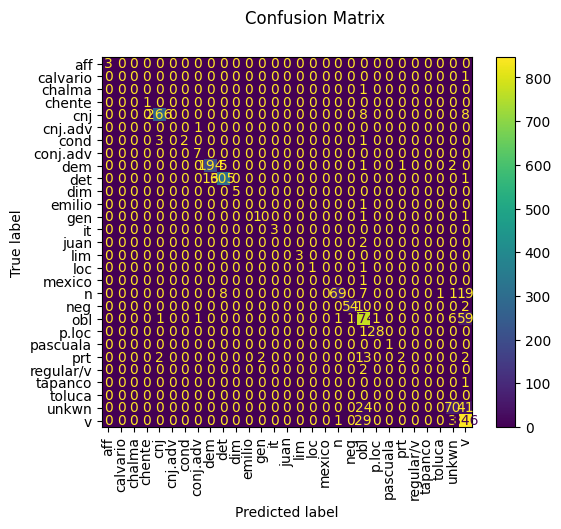

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_test_flat, y_pred_flat, xticks_rotation='vertical')
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("accuracy:",accuracy_score(y_pred_flat, y_test_flat))

print("precision",precision_score(y_pred_flat, y_test_flat, average="macro",zero_division=0))
print("recall",recall_score(y_pred_flat, y_test_flat, average="macro",zero_division=0))

print("f1_score",f1_score(y_pred_flat, y_test_flat, average="macro"))

accuracy: 0.899625723035046
precision 0.5671350534933722
recall 0.6433245656423492
f1_score 0.5858977130871064


In [ ]:
import random
user_input = ""
while True:
    print(f"Prueba el modelo, presiona RET tecla para continuar, q para salir: {user_input}")
    user_input = input(">>")
    
    if user_input == 'q':
        break  # Exit the loop if 'q' is entered
    
    
    # Continue executing code here
    
    n = random.randint(1,len(cuerpo))

    cadena = [tupla[0] for tupla in cuerpo[n]]
    real = [tupla[1] for tupla in cuerpo[n]]

    to_pred = [[pos for _, pos in cuerpo[n]]]
    pred = crf.predict(to_pred)
    print("oración:")
    print("\t","  ".join(word for word in cadena))
    print("predecido:")
    print("\t",pred)
    print("real:")
    print("\t",[real])
    
# Code outside the loop (after 'q' is entered) will continue executing
print("Done!")

Prueba el modelo, presiona RET tecla para continuar, q para salir: 


oración:
	 bidu̱mi  bizu̱hu̱
predecido:
	 [['prt', 'obl']]
real:
	 [['v', 'v']]
Prueba el modelo, presiona RET tecla para continuar, q para salir: 


oración:
	 gímátói
predecido:
	 [['v']]
real:
	 [['v']]
Prueba el modelo, presiona RET tecla para continuar, q para salir: 


oración:
	 go'únihé  yi̱  golpe
predecido:
	 [['prt', 'obl', 'gen']]
real:
	 [['v', 'det', 'obl']]
Prueba el modelo, presiona RET tecla para continuar, q para salir: 


oración:
	 ndri̱mánúhé  ri̱  telebisión
predecido:
	 [['prt', 'obl', 'gen']]
real:
	 [['v', 'det', 'obl']]
Prueba el modelo, presiona RET tecla para continuar, q para salir: 


oración:
	 gambu̱nk'i̱  ya  xo  mitsí  ni̱  ri̱  bähtsí
predecido:
	 [['prt', 'obl', 'gen', 'obl', 'gen', 'obl', 'gen']]
real:
	 [['v', 'cnj', 'cnj', 'v', 'dem', 'det', 'obl']]
Prueba el modelo, presiona RET tecla para continuar, q para salir: 
